In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, linear_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.feature_selection import RFECV

/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [3]:
df_total = pd.read_csv("./leo_kaggle/data.csv")
df_total

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [4]:
df_total["months"] = df_total["game_date"].apply(lambda x:x.split('-')[1])
df_total["years"] = df_total["game_date"].apply(lambda x:x.split('-')[0])
df_trans = df_total[df_total["shot_made_flag"] * 1 == df_total["shot_made_flag"]]
# We take only a tenth of the set to play with to have a better speed

df = df_trans.iloc[:len(df_trans) ]

df_test = df_total[df_total["shot_made_flag"] * 1 != df_total["shot_made_flag"]]
print(len(df))
df

25697


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,months,years
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,10,2000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,10,2000
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,10,2000
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,10,2000
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,10,2000
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7,10,2000
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9,10,2000
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10,10,2000
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11,10,2000
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12,11,2000


In [5]:
from sklearn import preprocessing

In [6]:
def cartesian_to_polar(df, name_x, name_y):
    df["loc_r"]=df.apply(lambda row:np.sqrt(row[name_x]**2 + row[name_y]**2), axis =1)
    df["loc_teta"]= df.apply(lambda row:np.arccos(row[name_x] / row["loc_r"]) if row["loc_r"] else 0, axis=1)

def drop_and_binarize(df, to_binarize, to_drop):
    new_df = df.copy()
    to_binarize =[feature for feature in to_binarize if feature not in to_drop]
    print(len(new_df.columns))
    new_df.drop(to_drop, axis=1, inplace=True)
    print(len(new_df.columns))
    lb = preprocessing.LabelBinarizer()
    for feature in to_binarize:
        lb.fit(df[feature])
        new_df[feature]=df[feature].apply(lambda x:lb.transform([x]).flatten())
    return new_df


In [7]:
def aux_df_to_array(ar):
    l = list()
    for elem in ar:
            if type(elem) is numpy.ndarray:
                l.extend(elem)
            else:
                l.append(elem)
    return np.array(l)

def df_to_array(df):
    return np.apply_along_axis(aux_df_to_array, 1, df.values)

In [8]:
def rescale(vect_train, min_max):
    res = preprocessing.MinMaxScaler(min_max)
    return res.fit_transform(vect_train)

def standardize(vect_train):
    sta = preprocessing.StandardScaler()
    return sta.fit_transform(vect_train)

In [9]:
cartesian_to_polar(df, "loc_x", "loc_y")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
features_to_binarize = ["action_type", "combined_shot_type", "shot_type", "shot_zone_area", "shot_zone_basic", "shot_zone_range", "team_name", "matchup", "opponent", "months", "years"]
features_to_drop = []
features_selected = ["action_type", "loc_r", "years", "matchup", "loc_teta", "months", "shot_zone_area", "previous_win_frequency", "n_shots_tried_before", "n_shots_made_before", "n_successive_shots", "combined_shot_type"]

In [11]:
def n_shots_before(shot):
    game_id = shot["game_id"]
    shots = df[df["game_id"] == game_id]
    mask = (shots["minutes_remaining"] == shot["minutes_remaining"]) & (shots["seconds_remaining"] > shot["seconds_remaining"]) | (shots["minutes_remaining"] > shot["minutes_remaining"])
    if shot["shot_id"]%100 ==0:
        print(shot["shot_id"])
    return shots[mask]["shot_made_flag"].count(), shots[mask]["shot_made_flag"].sum()

def n_successive_shots(shot):
    game_id = shot["game_id"]
    shots = df[df["game_id"] == game_id]
    shots = shots.sort_values(by=["minutes_remaining", "seconds_remaining"], ascending=False).reset_index()
    #On trouve l'index de shot
    index = 0
    for i, a in enumerate(shots["shot_id"]==shot["shot_id"]):
        if a:
            index = i
    result = 0
    for i in range(index - 1, -1, -1):
        if not shots.iloc[i]["shot_made_flag"] :
            print(index, i)
            result = index - i -1
            break
        elif not i :
            result = index
    return result

def add_on_fire_features(df):
    col = df.apply(n_shots_before, axis =1)
    col2 = df.apply(n_successive_shots, axis =1)
    print(len(col), len(col2), len(df))
    df["n_successive_shots"] = col2.reset_index(drop=True)
    df["n_shots_tried_before"]=col.apply(lambda x:x[0]).reset_index(drop=True)
    df["n_shots_made_before"]=col.apply(lambda x:x[1]).reset_index(drop=True)
    df["previous_win_frequency"]=col.apply(lambda x: (x[1] / x[0]) if x[0]>0 else 0 ).reset_index(drop=True)

In [12]:
add_on_fire_features(df)

100
200
400
500
600
700
800
900
1000
1100
1300
1400
1600
1700
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
4000
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8400
8500
8700
8900
9100
9200
9300
9500
9600
9700
9800
9900
10100
10300
10500
10700
10800
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12700
12800
12900
13000
13100
13200
13300
13400
13600
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15300
15400
15500
15600
15700
15800
16000
16100
16200
16400
16500
16700
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18100
18200
18300
18500
18700
18800
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
20000
20100
20200
20300
20400
20500
20600
20700
20800
20900
21000
21100
21200
214

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [13]:
df["loc_r"].iloc[23000:]

27489    222.811580
27490     13.000000
27491     38.600518
27492    169.729196
27493     45.276926
27494    202.388241
27495    258.804946
27496    167.886867
27498    191.261601
27499    171.125685
27500    140.388746
27501    162.246726
27502    156.540730
27503     53.009433
27505     65.436993
27507    711.860941
27509    191.650724
27510    149.083869
27511    158.483438
27512    206.847770
27514    198.116128
27515      0.000000
27516    103.392456
27517      0.000000
27518    238.648277
27519      0.000000
27520      0.000000
27521    223.329353
27522    256.844311
27523    267.200299
            ...    
30661      0.000000
30662     53.600373
30663    108.908218
30665     22.803509
30666    189.214164
30667    253.179778
30669    179.025138
30670     75.709973
30671      0.000000
30672    104.623133
30673    117.000000
30674    245.652193
30675    254.188906
30676    141.000000
30677    182.258059
30678     21.260292
30679      0.000000
30681    261.619953
30683    216.002315


In [14]:
new_df = drop_and_binarize(df, features_to_binarize, features_to_drop).reset_index()

33
33


In [15]:
new_df["previous_win_frequency"][10000:10010]

10000    0.285714
10001    0.000000
10002    0.500000
10003    0.250000
10004    0.166667
10005    0.000000
10006    1.000000
10007    0.750000
10008    0.363636
10009    0.600000
Name: previous_win_frequency, dtype: float64

In [16]:
        
vect_train = df_to_array(new_df[features_selected])   
#vect_train = standardize(vect_train)
vect_train = rescale(vect_train, (0,1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1,
              scoring='accuracy')
rfecv.fit(vect_train, new_df["shot_made_flag"].values, n_jobs=-1)

RFECV(cv=None,
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [36]:
rfecv.get_support()

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [37]:
vect_train

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [40]:
svc = SVC(probability=True)
scores = cross_val_score(svc, vect_train[:, rfecv.get_support()], new_df["shot_made_flag"], scoring="neg_log_loss", n_jobs=-1)
print(scores)
print(- np.mean(scores), np.std(scores))

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/usr/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7fe26ddfb130, file "/...2.7/dist-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7fe26ddfb130, file "/...2.7/dist-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2017, 11, 17, 12, 25, 28, 412855, tzinfo=tzlocal()), u'msg_id': u'4716DB0544B246F892B2072BEF7E09A8', u'msg_type': u'execute_request', u'session': u'905C4D7EFA57448E9EC1539A20150974', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'4716DB0544B246F892B2072BEF7E09A8', 'msg_type': u'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['905C4D7EFA57448E9EC1539A20150974']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2017, 11, 17, 12, 25, 28, 412855, tzinfo=tzlocal()), u'msg_id': u'4716DB0544B246F892B2072BEF7E09A8', u'msg_type': u'execute_request', u'session': u'905C4D7EFA57448E9EC1539A20150974', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'4716DB0544B246F892B2072BEF7E09A8', 'msg_type': u'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['905C4D7EFA57448E9EC1539A20150974'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2017, 11, 17, 12, 25, 28, 412855, tzinfo=tzlocal()), u'msg_id': u'4716DB0544B246F892B2072BEF7E09A8', u'msg_type': u'execute_request', u'session': u'905C4D7EFA57448E9EC1539A20150974', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'4716DB0544B246F892B2072BEF7E09A8', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'svc = LogisticRegression()\nscores = cross_val...cores)\nprint(- np.mean(scores), np.std(scores))', store_history=True, silent=False, shell_futures=True)
   2713                 self.displayhook.exec_result = result
   2714 
   2715                 # Execute the user code
   2716                 interactivity = "none" if silent else self.ast_node_interactivity
   2717                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2718                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2719                 
   2720                 self.last_execution_succeeded = not has_raised
   2721 
   2722                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Print object>, <_ast.Print object>], cell_name='<ipython-input-40-ceb275732b87>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 7fe1fa061090, executi..._before_exec=None error_in_exec=None result=None>)
   2817 
   2818         try:
   2819             for i, node in enumerate(to_run_exec):
   2820                 mod = ast.Module([node])
   2821                 code = compiler(mod, cell_name, "exec")
-> 2822                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fe1f97e3a30, file "<ipython-input-40-ceb275732b87>", line 2>
        result = <ExecutionResult object at 7fe1fa061090, executi..._before_exec=None error_in_exec=None result=None>
   2823                     return True
   2824 
   2825             for i, node in enumerate(to_run_interactive):
   2826                 mod = ast.Interactive([node])

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fe1f97e3a30, file "<ipython-input-40-ceb275732b87>", line 2>, result=<ExecutionResult object at 7fe1fa061090, executi..._before_exec=None error_in_exec=None result=None>)
   2877         outflag = 1  # happens in more places, so it's easier as default
   2878         try:
   2879             try:
   2880                 self.hooks.pre_run_code_hook()
   2881                 #rprint('Running code', repr(code_obj)) # dbg
-> 2882                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fe1f97e3a30, file "<ipython-input-40-ceb275732b87>", line 2>
        self.user_global_ns = {'ALLOW_THREADS': 1, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Annotation': <class 'matplotlib.text.Annotation'>, 'Arrow': <class 'matplotlib.patches.Arrow'>, 'Artist': <class 'matplotlib.artist.Artist'>, 'AutoLocator': <class 'matplotlib.ticker.AutoLocator'>, 'Axes': <class 'matplotlib.axes._axes.Axes'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'Button': <class 'matplotlib.widgets.Button'>, ...}
        self.user_ns = {'ALLOW_THREADS': 1, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Annotation': <class 'matplotlib.text.Annotation'>, 'Arrow': <class 'matplotlib.patches.Arrow'>, 'Artist': <class 'matplotlib.artist.Artist'>, 'AutoLocator': <class 'matplotlib.ticker.AutoLocator'>, 'Axes': <class 'matplotlib.axes._axes.Axes'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'Button': <class 'matplotlib.widgets.Button'>, ...}
   2883             finally:
   2884                 # Reset our crash handler in place
   2885                 sys.excepthook = old_excepthook
   2886         except SystemExit as e:

...........................................................................
/notebooks/<ipython-input-40-ceb275732b87> in <module>()
      1 
----> 2 
      3 
      4 
      5 svc = LogisticRegression()
      6 scores = cross_val_score(svc, vect_train, new_df["shot_made_flag"], scoring="neg_log_loss", n_jobs=-1)
      7 print(scores)
      8 print(- np.mean(scores), np.std(scores))
      9 
     10 

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), y=0        0.0
1        1.0
2        0.0
3        ...me: shot_made_flag, Length: 25697, dtype: float64, groups=None, scoring='neg_log_loss', cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    135     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    136                         pre_dispatch=pre_dispatch)
    137     scores = parallel(delayed(_fit_and_score)(clone(estimator), X, y, scorer,
    138                                               train, test, verbose, None,
    139                                               fit_params)
--> 140                       for train, test in cv_iter)
        cv_iter = [(array([ 8476,  8478,  8485, ..., 25694, 25695, 25696]), array([   0,    1,    2, ..., 8636, 8639, 8640])), (array([    0,     1,     2, ..., 25694, 25695, 25696]), array([ 8476,  8478,  8485, ..., 17354, 17355, 17356])), (array([    0,     1,     2, ..., 17354, 17355, 17356]), array([16876, 16877, 16879, ..., 25694, 25695, 25696]))]
    141     return np.array(scores)[:, 0]
    142 
    143 
    144 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Nov 17 12:25:28 2017
PID: 593                                     Python 2.7.12: /usr/bin/python
...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), memmap([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
   ....],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), 0        0.0
1        1.0
2        0.0
3        ...me: shot_made_flag, Length: 25697, dtype: float64, make_scorer(log_loss, greater_is_better=False, needs_proba=True), array([ 8476,  8478,  8485, ..., 25694, 25695, 25696]), array([   0,    1,    2, ..., 8636, 8639, 8640]), 0, None, None)
        kwargs = {}
        self.items = [(<function _fit_and_score>, (LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), memmap([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
   ....],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), 0        0.0
1        1.0
2        0.0
3        ...me: shot_made_flag, Length: 25697, dtype: float64, make_scorer(log_loss, greater_is_better=False, needs_proba=True), array([ 8476,  8478,  8485, ..., 25694, 25695, 25696]), array([   0,    1,    2, ..., 8636, 8639, 8640]), 0, None, None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=memmap([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
   ....],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), y=0        0.0
1        1.0
2        0.0
3        ...me: shot_made_flag, Length: 25697, dtype: float64, scorer=make_scorer(log_loss, greater_is_better=False, needs_proba=True), train=array([ 8476,  8478,  8485, ..., 25694, 25695, 25696]), test=array([   0,    1,    2, ..., 8636, 8639, 8640]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    233 
    234     try:
    235         if y_train is None:
    236             estimator.fit(X_train, **fit_params)
    237         else:
--> 238             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method LogisticRegression.fit of Logistic...l=0.0001,
          verbose=0, warm_start=False)>
        X_train = memmap([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
   ....],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.]])
        y_train = 8476     1.0
8478     1.0
8485     1.0
8490     ...me: shot_made_flag, Length: 17131, dtype: float64
        fit_params = {}
    239 
    240     except Exception as e:
    241         # Note fit time as time until error
    242         fit_time = time.time() - start_time

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py in fit(self=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=memmap([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
   ....],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), y=8476     1.0
8478     1.0
8485     1.0
8490     ...me: shot_made_flag, Length: 17131, dtype: float64, sample_weight=None)
   1168         if not isinstance(self.tol, numbers.Number) or self.tol < 0:
   1169             raise ValueError("Tolerance for stopping criteria must be "
   1170                              "positive; got (tol=%r)" % self.tol)
   1171 
   1172         X, y = check_X_y(X, y, accept_sparse='csr', dtype=np.float64,
-> 1173                          order="C")
   1174         check_classification_targets(y)
   1175         self.classes_ = np.unique(y)
   1176         n_samples, n_features = X.shape
   1177 

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py in check_X_y(X=memmap([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
   ....],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), y=8476     1.0
8478     1.0
8485     1.0
8490     ...me: shot_made_flag, Length: 17131, dtype: float64, accept_sparse='csr', dtype=<type 'numpy.float64'>, order='C', copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=False, ensure_min_samples=1, ensure_min_features=1, y_numeric=False, warn_on_dtype=False, estimator=None)
    516     y_converted : object
    517         The converted and validated y.
    518     """
    519     X = check_array(X, accept_sparse, dtype, order, copy, force_all_finite,
    520                     ensure_2d, allow_nd, ensure_min_samples,
--> 521                     ensure_min_features, warn_on_dtype, estimator)
        ensure_min_features = 1
        warn_on_dtype = False
        estimator = None
    522     if multi_output:
    523         y = check_array(y, 'csr', force_all_finite=True, ensure_2d=False,
    524                         dtype=None)
    525     else:

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py in check_array(array=array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), accept_sparse=['csr'], dtype=<type 'numpy.float64'>, order='C', copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    402             array = array.astype(np.float64)
    403         if not allow_nd and array.ndim >= 3:
    404             raise ValueError("Found array with dim %d. %s expected <= 2."
    405                              % (array.ndim, estimator_name))
    406         if force_all_finite:
--> 407             _assert_all_finite(array)
        array = array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])
    408 
    409     shape_repr = _shape_repr(array.shape)
    410     if ensure_min_samples > 0:
    411         n_samples = _num_samples(array)

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py in _assert_all_finite(X=array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]]))
     53     # everything is finite; fall back to O(n) space np.isfinite to prevent
     54     # false positives from overflow in sum method.
     55     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
     56             and not np.isfinite(X).all()):
     57         raise ValueError("Input contains NaN, infinity"
---> 58                          " or a value too large for %r." % X.dtype)
        X.dtype = dtype('float64')
     59 
     60 
     61 def assert_all_finite(X):
     62     """Throw a ValueError if X contains NaN or infinity.

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
___________________________________________________________________________

In [57]:
len(new_df[features_selected].iloc[0][0])

55

In [58]:
new_df[features_selected]

,action_type,loc_r,years,matchup,loc_teta,months,shot_zone_area
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",157.000000,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.141593,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",168.600119,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.213111,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",222.865430,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.903063,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 1, 0]"
3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",145.416643,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.065876,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 0]"
5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1, 0, 0, 0, 0]"
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",126.051577,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.112576,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 0]"
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",129.282636,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.828907,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1, 0, 0, 0, 0]"
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",255.890602,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.946949,"[0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0]"
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",175.413796,2000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.809587,"[0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 1, 0]"


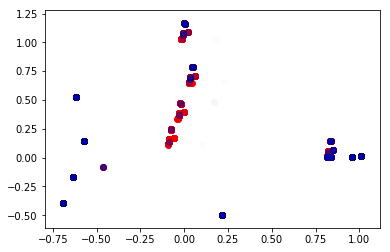

In [100]:
from sklearn.decomposition import PCA, NMF
X = vect_train[:, rfecv.get_support()]
lab = new_df["shot_made_flag"]
pca = PCA(n_components = 2)
l = pca.fit_transform(X)
x_pts = [l[i][0] for i in range(len(l)) if lab[i]]
y_pts = [l[i][1] for i in range(len(l)) if lab[i]]
plt.scatter(x_pts, y_pts, c='r')
x_pts = [l[i][0] for i in range(len(l)) if not lab[i]]
y_pts = [l[i][1] for i in range(len(l)) if not lab[i]]
plt.scatter(x_pts, y_pts, c='b', alpha=0.01)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
nei = KNeighborsClassifier(n_neighbors=300)

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_neighbors':[a for a in range(100, 801, 100)]}
clf_grid_search = GridSearchCV(nei, param_grid, scoring = "neg_log_loss")

In [101]:
clf_grid_search.fit(vect_train[:, rfecv.get_support()], new_df["shot_made_flag"])

KeyboardInterrupt: 

In [80]:
scores = cross_val_score(nei, vect_train[:, rfecv.get_support()], new_df["shot_made_flag"], scoring="neg_log_loss", n_jobs=-1)
print(scores)
print(- np.mean(scores), np.std(scores))

[-0.62026846 -0.63229218 -0.62629517]
(0.62628526872935952, 0.0049086669549989097)
